<a href="https://colab.research.google.com/github/alouvre/CapstoneNeeds/blob/main/Data_Collecting_FiturPrediksiPolaPengeluaranUser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Information**

Ambil data dari Kaggle : Bank Customer Segmentation (1M+ Transactions) https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation/data

# **Set Environment**

In [59]:
# Set Kaggle

# Menginstall kaggle
!pip install -q kaggle
# Membuat direktori
!mkdir ~/.kaggle
# Menyalin kaggle.json ke dir kaggle
!cp kaggle.json ~/.kaggle/
# Meminta izin untuk akses
!chmod 600 ~/.kaggle/kaggle.json

!kaggle -h

mkdir: cannot create directory ‘/root/.kaggle’: File exists
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,models,m,files,f,config} ...

options:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit

commands:
  {competitions,c,datasets,d,kernels,k,models,m,files,f,config}
                        Use one of:
                        competitions {list, files, download, submit, submissions, leaderboard}
                        datasets {list, files, download, create, version, init, metadata, status}
                        kernels {list, init, push, pull, output, status}
                        config {view, set, unset}
    competitions (c)    Commands related to Kaggle competitions
    datasets (d)        Commands related to Kaggle datasets
    kernels (k)         Commands related to Kaggle kernels
    files (f)           Commands related files
    config              Configuration settings


# **Data Loading**

In [60]:
import zipfile

# Mengunduh dataset
!kaggle datasets download -d 'shivamb/bank-customer-segmentation'

# Membuat direktori dataset
!mkdir dataset

# Mengekstraksi file zip
nama_file_zip = 'bank-customer-segmentation.zip'
nama_folder_tujuan = 'dataset'
dataset_zip = zipfile.ZipFile(nama_file_zip,'r')
dataset_zip.extractall('dataset')
dataset_zip.close()

# Memindahkan files ke direktori dataset
!mv bank-customer-segmentation.zip dataset

 74% 18.0M/24.2M [00:00<00:00, 183MB/s]
100% 24.2M/24.2M [00:00<00:00, 177MB/s]
mkdir: cannot create directory ‘dataset’: File exists


In [61]:
import pandas as pd

# Memuat dataset dari direktori dataset
df = pd.read_csv('dataset/bank_transactions.csv')

# To stretch head function output to the notebook width
pd.set_option('display.max_columns', None)

# Menampilkan data mentah
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819,2/8/16,143207,25
1,T2,C2142763,4/4/57,M,JHAJJAR,2271,2/8/16,141858,27999
2,T3,C4417068,26/11/96,F,MUMBAI,17874,2/8/16,142712,459
3,T4,C5342380,14/9/73,F,MUMBAI,866503,2/8/16,142714,2060
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714,2/8/16,181156,1762


In [62]:
# Menampilkan jumlah keseluruhan data mentah
df.shape

(1048567, 9)

In [63]:
# getting the statistical measures of the data
df.describe()

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,1046198,1048567,1048567
mean,115404,157088,1574
std,846485,51262,6575
min,0,0,0
25%,4722,124030,161
50%,16792,164226,459
75%,57657,200010,1200
max,115035495,235959,1560035


# **Data Preprocessing**

In [64]:
# Memilih kolom-kolom yang relevan untuk digunakan
data = df[['CustomerID', 'CustAccountBalance', 'TransactionAmount (INR)', 'TransactionDate']]

data.head()

,CustomerID,CustAccountBalance,TransactionAmount (INR),TransactionDate
0,C5841053,17819,25,2/8/16
1,C2142763,2271,27999,2/8/16
2,C4417068,17874,459,2/8/16
3,C5342380,866503,2060,2/8/16
4,C9031234,6714,1762,2/8/16


In [65]:
# Mengganti nama beberapa kolom
data = data.rename(columns={'CustomerID': 'UserID', 'CustAccountBalance': 'SaldoUser', 'TransactionAmount (INR)': 'TransactionAmount(IDR)'})

data.head()

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate
0,C5841053,17819,25,2/8/16
1,C2142763,2271,27999,2/8/16
2,C4417068,17874,459,2/8/16
3,C5342380,866503,2060,2/8/16
4,C9031234,6714,1762,2/8/16


In [66]:
# Untuk menampilkan informasi mengenai dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 4 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserID                  1048567 non-null  object 
 1   SaldoUser               1046198 non-null  float64
 2   TransactionAmount(IDR)  1048567 non-null  float64
 3   TransactionDate         1048567 non-null  object 
dtypes: float64(2), object(2)
memory usage: 32.0+ MB


In [67]:
data.isnull().sum()

UserID                       0
SaldoUser                 2369
TransactionAmount(IDR)       0
TransactionDate              0
dtype: int64

In [68]:
mean_saldo = data['SaldoUser'].mean()
data['SaldoUser'].fillna(mean_saldo, inplace=True)

In [69]:
data.isnull().sum()

UserID                    0
SaldoUser                 0
TransactionAmount(IDR)    0
TransactionDate           0
dtype: int64

In [70]:
# Definisikan kurs pertukaran (contoh: 1 INR = 188,42 IDR)
inr_to_idr_exchange_rate = 188.42

# Buat kolom baru untuk jumlah transaksi dalam IDR
data['TransactionAmount(IDR)'] = data['TransactionAmount(IDR)'].astype(float)
data['TransactionAmount(IDR)'] = data['TransactionAmount(IDR)'] * inr_to_idr_exchange_rate

# Buat kolom baru untuk saldo pengguna dalam IDR
data['SaldoUser'] = data['SaldoUser'].astype(float)
data['SaldoUser'] = data['SaldoUser'] * inr_to_idr_exchange_rate

In [71]:
data.head()

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate
0,C5841053,3357465,4710,2/8/16
1,C2142763,427843,5275572,2/8/16
2,C4417068,3367902,86485,2/8/16
3,C5342380,163266535,388145,2/8/16
4,C9031234,1265133,332090,2/8/16


In [72]:
pd.options.display.float_format = '{:.0f}'.format
# pd.options.display.float_format = None

# Konversi nilai saldo User dari format ilmiah ke float
data['SaldoUser'] = data['SaldoUser'].apply(lambda x: float(f"{x:.10f}"))

In [73]:
data.head()

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate
0,C5841053,3357465,4710,2/8/16
1,C2142763,427843,5275572,2/8/16
2,C4417068,3367902,86485,2/8/16
3,C5342380,163266535,388145,2/8/16
4,C9031234,1265133,332090,2/8/16


In [74]:
data['TransactionDate'].unique()

array(['2/8/16', '1/8/16', '3/8/16', '5/8/16', '4/8/16', '6/8/16',
       '9/8/16', '8/8/16', '12/8/16', '7/8/16', '21/10/16', '16/10/16',
       '10/8/16', '14/8/16', '17/8/16', '21/8/16', '19/8/16', '24/8/16',
       '22/8/16', '29/8/16', '31/8/16', '22/9/16', '23/9/16', '13/8/16',
       '25/8/16', '28/8/16', '15/8/16', '27/8/16', '20/8/16', '23/8/16',
       '30/8/16', '11/8/16', '16/8/16', '26/8/16', '27/9/16', '18/8/16',
       '25/9/16', '26/9/16', '30/9/16', '3/9/16', '2/9/16', '1/9/16',
       '6/9/16', '5/9/16', '4/9/16', '9/9/16', '8/9/16', '7/9/16',
       '12/9/16', '11/9/16', '10/9/16', '15/9/16', '14/9/16', '13/9/16',
       '18/9/16'], dtype=object)

In [75]:
# Konversi kolom TransactionDate ke tipe data datetime
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'], format='%d/%m/%y')

# Pecah kolom TransactionDate menjadi tiga kolom terpisah: Hari, Bulan, Tahun
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionMonth'] = data['TransactionDate'].dt.month
data['TransactionYear'] = data['TransactionDate'].dt.year

# Tampilkan hasil
data.head()

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear
0,C5841053,3357465,4710,2016-08-02,2,8,2016
1,C2142763,427843,5275572,2016-08-02,2,8,2016
2,C4417068,3367902,86485,2016-08-02,2,8,2016
3,C5342380,163266535,388145,2016-08-02,2,8,2016
4,C9031234,1265133,332090,2016-08-02,2,8,2016


Metode pelabelan menggunakan kuartil pada dataset transaksi dari berbagai nasabah dapat diterapkan dengan mempertimbangkan nilai kuartil dari seluruh dataset, bukan masing-masing transaksi pengguna. Dalam konteks ini, kita mengasumsikan bahwa kita ingin melihat pola pengeluaran relatif terhadap nasabah lain dalam dataset.

Dalam metode kuartil untuk pelabelan, tidak diperlukan pengurutan transaksi berdasarkan jumlah pengeluaran. Metode kuartil memerlukan perhitungan nilai kuartil (seperti q1 dan q3) dari seluruh dataset transaksi (jumlah pengeluaran) untuk menentukan batas-batas kategori (hemat, normal, dan boros).

Pengurutan hanya diperlukan jika Anda ingin membuat analisis terhadap urutan transaksi berdasarkan jumlah pengeluaran, seperti mengetahui transaksi terbesar atau terkecil. Namun, untuk tujuan pelabelan berdasarkan kuartil, Anda hanya perlu menghitung nilai kuartil dari seluruh dataset, dan kemudian memberi label pada setiap transaksi pengguna berdasarkan nilai kuartil tersebut.

In [76]:
# Melabeli pola pengeluaran termasuk Hemat, Normal, atau Boros menggunakan metode kuartil

# Hitung kuartil
q1 = data['TransactionAmount(IDR)'].quantile(0.25)
q3 = data['TransactionAmount(IDR)'].quantile(0.75)

# Fungsi untuk menentukan label berdasarkan kuartil
def label_kategori(selisih_saldo):
    if selisih_saldo <= q1:
        return 'Hemat'
    elif q1 < selisih_saldo <= q3:
        return 'Normal'
    else:
        return 'Boros'

# Tambahkan kolom label
data['Label'] = data['TransactionAmount(IDR)'].apply(label_kategori)

# Tampilkan hasil
data[['UserID', 'TransactionAmount(IDR)', 'Label']]

,UserID,TransactionAmount(IDR),Label
0,C5841053,4710,Hemat
1,C2142763,5275572,Boros
2,C4417068,86485,Normal
3,C5342380,388145,Boros
4,C9031234,332090,Boros
...,...,...,...
1048562,C8020229,150548,Normal
1048563,C6459278,86673,Normal
1048564,C6412354,145083,Normal
1048565,C6420483,188420,Normal


In [77]:
data['Label'].value_counts()

Normal    525975
Hemat     262320
Boros     260272
Name: Label, dtype: int64

In [78]:
# Melihat rentang jumlah transaksi untuk masing-masing label
hemat_range = (data[data['Label'] == 'Hemat']['TransactionAmount(IDR)'].min(), data[data['Label'] == 'Hemat']['TransactionAmount(IDR)'].max())
normal_range = (data[data['Label'] == 'Normal']['TransactionAmount(IDR)'].min(), data[data['Label'] == 'Normal']['TransactionAmount(IDR)'].max())
boros_range = (data[data['Label'] == 'Boros']['TransactionAmount(IDR)'].min(), data[data['Label'] == 'Boros']['TransactionAmount(IDR)'].max())

# Tampilkan hasil
print("Rentang jumlah transaksi untuk label Hemat:", hemat_range)
print("Rentang jumlah transaksi untuk label Normal:", normal_range)
print("Rentang jumlah transaksi untuk label Boros:", boros_range)

Rentang jumlah transaksi untuk label Hemat: (0.0, 30335.62)
Rentang jumlah transaksi untuk label Normal: (30337.504199999996, 226103.99999999997)
Rentang jumlah transaksi untuk label Boros: (226105.88419999997, 293941792.81579995)


In [79]:
# Mendapatkan nilai rata-rata jumlah transaksi untuk masing-masing label
mean_hemat = data[data['Label'] == 'Hemat']['TransactionAmount(IDR)'].mean()
mean_normal = data[data['Label'] == 'Normal']['TransactionAmount(IDR)'].mean()
mean_boros = data[data['Label'] == 'Boros']['TransactionAmount(IDR)'].mean()

# Tampilkan hasil
print("Rata-rata jumlah transaksi untuk label Hemat:", mean_hemat)
print("Rata-rata jumlah transaksi untuk label Normal:", mean_normal)
print("Rata-rata jumlah transaksi untuk label Boros:", mean_boros)

Rata-rata jumlah transaksi untuk label Hemat: 13546.018681129919
Rata-rata jumlah transaksi untuk label Normal: 97897.05586103484
Rata-rata jumlah transaksi untuk label Boros: 983579.2408152914


In [80]:
from sklearn.preprocessing import LabelEncoder

# Misalkan 'label_column' adalah kolom yang berisi label "hemat", "normal", dan "boros"
label_column = data['Label']

# Inisialisasi objek LabelEncoder
label_encoder = LabelEncoder()

# Fit dan transform label_column
encoded_labels = label_encoder.fit_transform(label_column)

# Ganti kolom 'Label' pada DataFrame dengan nilai-nilai yang sudah terkodekan
data['Label'] = encoded_labels

# Tampilkan hasil encoding
data[['UserID', 'TransactionAmount(IDR)', 'Label']]

,UserID,TransactionAmount(IDR),Label
0,C5841053,4710,1
1,C2142763,5275572,0
2,C4417068,86485,2
3,C5342380,388145,0
4,C9031234,332090,0
...,...,...,...
1048562,C8020229,150548,2
1048563,C6459278,86673,2
1048564,C6412354,145083,2
1048565,C6420483,188420,2


Hemat = 1
Boros = 0
Normal = 2

# **Explanatory Analysis Data**

<ipython-input-81-2d3f3165989a>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr()[['Label']].sort_values(by='Label', ascending=False),


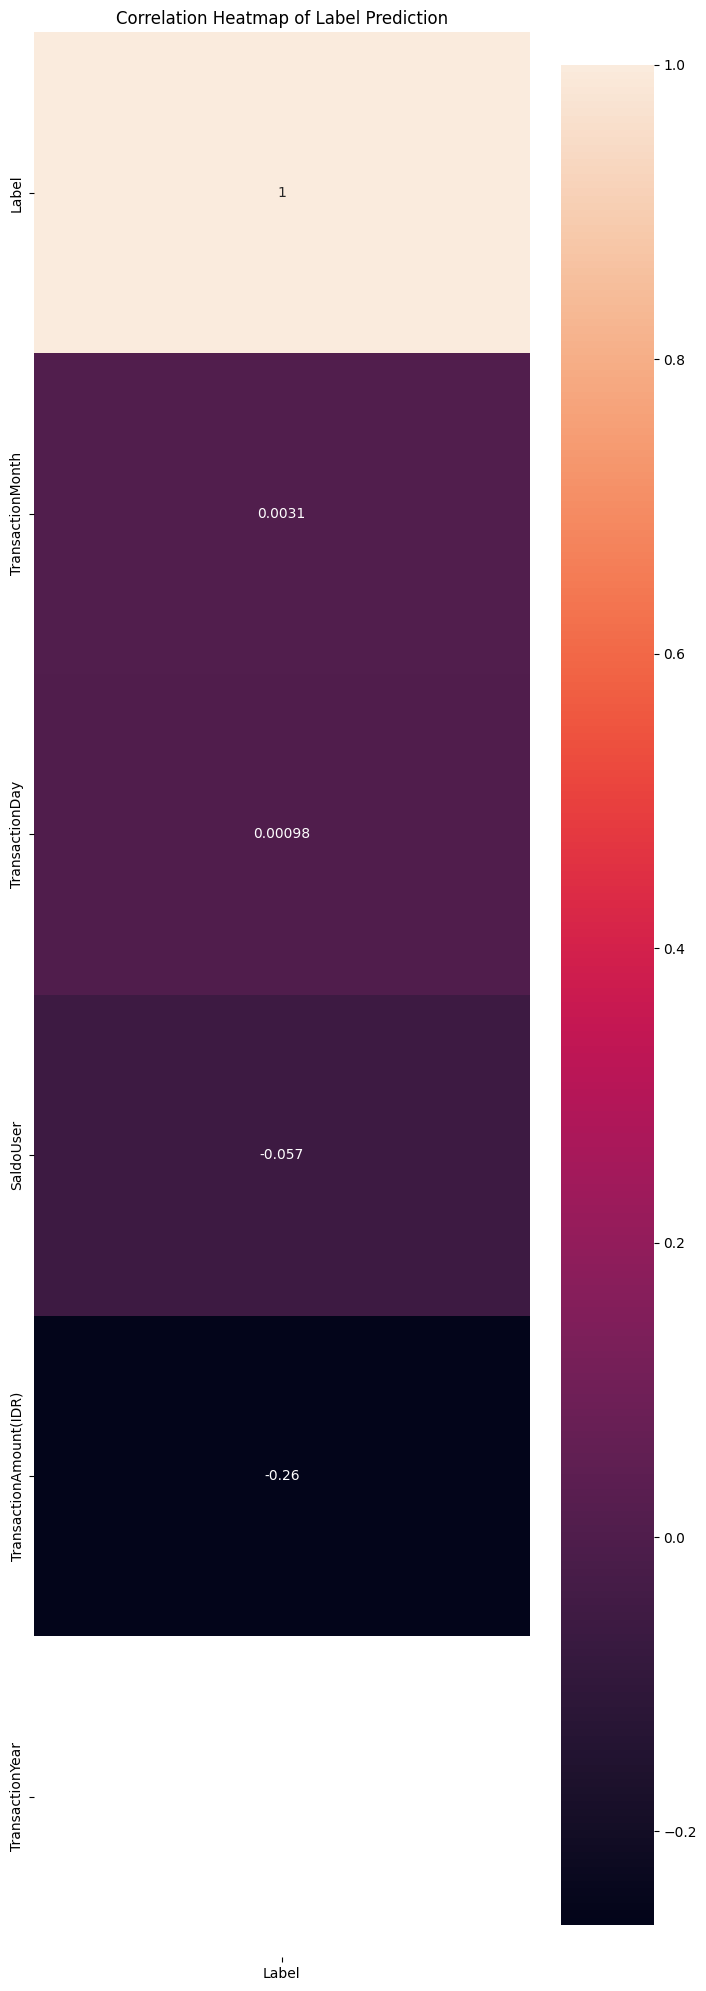

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots()
fig.set_size_inches((8,25))
sns.heatmap(data.corr()[['Label']].sort_values(by='Label', ascending=False),
                                                   annot = True)

plt.title('Correlation Heatmap of Label Prediction')
plt.show()

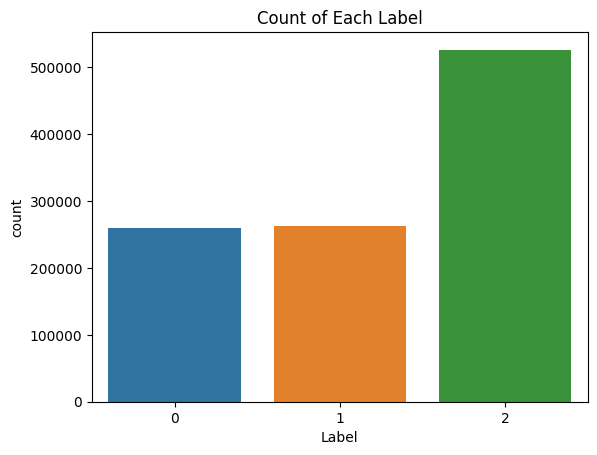

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi countplot untuk data label
sns.countplot(x='Label', data=data)
plt.title('Count of Each Label')
plt.show()

In [83]:
# Untuk mengetahui data diambil pada tahun berapa
data['TransactionYear'].value_counts()

2016    1048567
Name: TransactionYear, dtype: int64

In [84]:
# Untuk mengetahui data diambil pada bulan apa saja dan melihat berapa jumlah data tiap bulannya
data['TransactionMonth'].value_counts()

8     653933
9     390975
10      3659
Name: TransactionMonth, dtype: int64

In [85]:
data = data[data['TransactionMonth'] != 10]

In [86]:
data['TransactionMonth'].value_counts()

8    653933
9    390975
Name: TransactionMonth, dtype: int64

In [87]:
# Untuk mengetahui jumlah keseluruhan transaksi tiap bulannya
total_transaksi_per_bulan = data.groupby(['TransactionMonth', 'UserID'])['TransactionAmount(IDR)'].sum()
total_transaksi_per_bulan

TransactionMonth  UserID  
8                 C1010011    67078
                  C1010012   282442
                  C1010014   274151
                  C1010024   942100
                  C1010028   104950
                              ...  
9                 C9099357    99109
                  C9099661     6406
                  C9099811     5087
                  C9099877    41829
                  C9099956   161099
Name: TransactionAmount(IDR), Length: 952740, dtype: float64

In [88]:
# Untuk mengetahui berapa banyak tiap user melakukan transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
user_transaction_counts = data['UserID'].value_counts()
user_transaction_data = pd.DataFrame({'UserID': user_transaction_counts.index, 'TransactionCount': user_transaction_counts.values})
user_transaction_data

,UserID,TransactionCount
0,C1026833,6
1,C4021562,6
2,C1113684,6
3,C4513786,6
4,C5533885,6
...,...,...
881703,C7225192,1
881704,C2510061,1
881705,C1510251,1
881706,C4387588,1


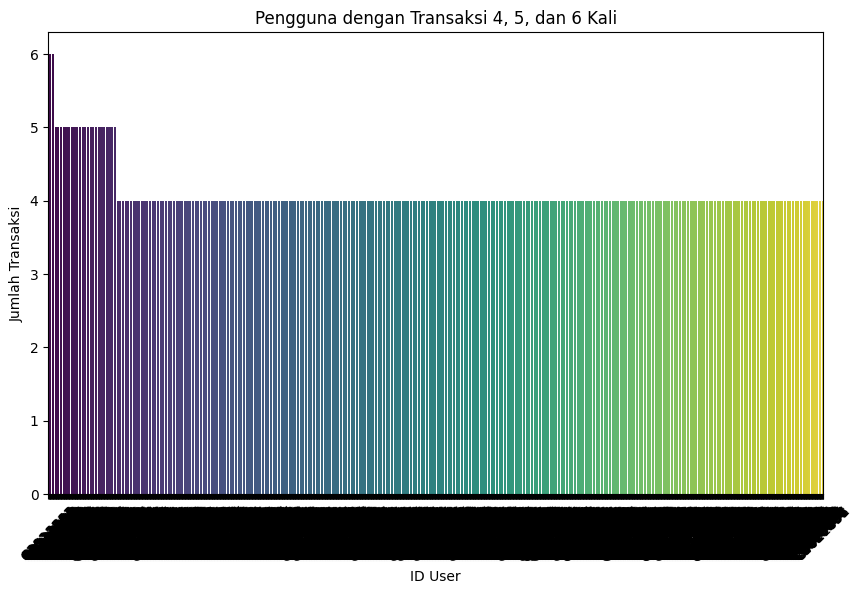

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data untuk pengguna dengan jumlah transaksi 4, 5, dan 6
specific_users = user_transaction_data[user_transaction_data['TransactionCount'].isin([4, 5, 6])]

# Visualisasi data transaksi pengguna spesifik
plt.figure(figsize=(10, 6))
sns.barplot(x=specific_users['UserID'], y=specific_users['TransactionCount'], palette='viridis')
plt.xlabel('ID User')
plt.ylabel('Jumlah Transaksi')
plt.title('Pengguna dengan Transaksi 4, 5, dan 6 Kali')
plt.xticks(rotation=45)
plt.show()

In [90]:
# Untuk memilih user yang melakukan 4-6 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts >= 4) & (user_transaction_counts <= 6)].index
filtered_data = data[data['UserID'].isin(selected_users)]
filtered_data

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
6,C7126560,183419,106646,2016-08-02,2,8,2016,2
193,C4325361,25098219,18842000,2016-08-07,7,8,2016,0
3861,C4640859,1680348,41452,2016-09-22,22,9,2016,2
3910,C8034390,20036078,58410,2016-09-22,22,9,2016,2
4217,C6933139,8146250,74049,2016-09-23,23,9,2016,2
...,...,...,...,...,...,...,...,...
1048006,C3040576,46292250,144239,2016-09-18,18,9,2016,2
1048065,C1629287,2736505,47482,2016-09-18,18,9,2016,2
1048100,C2439181,734152,56526,2016-09-18,18,9,2016,2
1048117,C1533452,34833886,86673,2016-09-18,18,9,2016,2


In [91]:
# Untuk memilih user yang melakukan 4 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts == 4)].index
filtered_data = data[data['UserID'].isin(selected_users)]
filtered_data

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
6,C7126560,183419,106646,2016-08-02,2,8,2016,2
3861,C4640859,1680348,41452,2016-09-22,22,9,2016,2
3910,C8034390,20036078,58410,2016-09-22,22,9,2016,2
4217,C6933139,8146250,74049,2016-09-23,23,9,2016,2
4504,C1915032,944713,16581,2016-09-22,22,9,2016,1
...,...,...,...,...,...,...,...,...
1048006,C3040576,46292250,144239,2016-09-18,18,9,2016,2
1048065,C1629287,2736505,47482,2016-09-18,18,9,2016,2
1048100,C2439181,734152,56526,2016-09-18,18,9,2016,2
1048117,C1533452,34833886,86673,2016-09-18,18,9,2016,2


In [92]:
# Untuk memilih user yang melakukan 5 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts == 5)].index
filtered_data = data[data['UserID'].isin(selected_users)]
filtered_data

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
193,C4325361,25098219,18842000,2016-08-07,7,8,2016,0
4513,C2833541,1155,169578,2016-09-23,23,9,2016,2
5590,C2618678,1407205,268046,2016-09-22,22,9,2016,0
6549,C3638492,7418533,7537,2016-09-25,25,9,2016,1
7890,C3524976,4288023,9421,2016-09-25,25,9,2016,1
...,...,...,...,...,...,...,...,...
1040909,C4631592,119,35611,2016-09-18,18,9,2016,2
1041063,C6735715,16915942,277731,2016-09-18,18,9,2016,0
1045312,C8137979,2989417,103631,2016-09-18,18,9,2016,2
1046146,C4423377,3342916,119187,2016-09-18,18,9,2016,2


In [93]:
# Untuk memilih user yang melakukan 6 kali transaksi selama 3 bulan (Agustus, September, Oktober) pada tahun 2016
selected_users = user_transaction_counts[(user_transaction_counts == 6)].index
filtered_data = data[data['UserID'].isin(selected_users)]
filtered_data

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
13195,C4327447,1896489,5653,2016-09-26,26,9,2016,1
19882,C3226689,2142222,37684,2016-09-26,26,9,2016,2
28272,C5533885,1749188,20349,2016-09-25,25,9,2016,1
35317,C6624352,28796666,395256,2016-09-27,27,9,2016,0
35613,C3226689,18242911,78760,2016-09-30,30,9,2016,2
...,...,...,...,...,...,...,...,...
922508,C6222360,993143,18842,2016-09-12,12,9,2016,1
944746,C5531319,720115,85354,2016-09-11,11,9,2016,2
949173,C4513786,1888083,9421,2016-09-10,10,9,2016,1
977856,C6222360,91003,18842,2016-09-15,15,9,2016,1


In [94]:
# Contoh Transaksi Sebanyak 4 kali dengan UserID = C7126560
data[data['UserID'] == 'C7126560']

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
6,C7126560,183419,106646,2016-08-02,2,8,2016,2
835789,C7126560,386704,6783,2016-09-04,4,9,2016,1
894830,C7126560,2365766,3580,2016-09-07,7,9,2016,1
967750,C7126560,6562638,37684,2016-09-10,10,9,2016,2


In [95]:
data.head(10)

,UserID,SaldoUser,TransactionAmount(IDR),TransactionDate,TransactionDay,TransactionMonth,TransactionYear,Label
0,C5841053,3357465,4710,2016-08-02,2,8,2016,1
1,C2142763,427843,5275572,2016-08-02,2,8,2016,0
2,C4417068,3367902,86485,2016-08-02,2,8,2016,2
3,C5342380,163266535,388145,2016-08-02,2,8,2016,0
4,C9031234,1265133,332090,2016-08-02,2,8,2016,0
5,C1536588,10101045,127372,2016-08-02,2,8,2016,2
6,C7126560,183419,106646,2016-08-02,2,8,2016,2
7,C1220223,17914133,27886,2016-08-02,2,8,2016,1
8,C8536061,2808769,156954,2016-08-02,2,8,2016,2
9,C6638934,806291,54474,2016-08-02,2,8,2016,2


# **Data Training**

In [96]:
data.columns

Index(['UserID', 'SaldoUser', 'TransactionAmount(IDR)', 'TransactionDate',
       'TransactionDay', 'TransactionMonth', 'TransactionYear', 'Label'],
      dtype='object')

In [97]:
X = data.drop(['UserID', 'TransactionDate', 'TransactionDay', 'TransactionMonth', 'TransactionYear', 'Label'], axis=1)
Y = data['Label']

In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 2)

In [99]:
X_train

,SaldoUser,TransactionAmount(IDR)
16018,85652634,188420
842151,2250534,62179
374785,628271,11305
425928,253459,979030
802474,534380,11305
...,...,...
868736,1091950,72926
1021833,4930618,218567
938268,2174259,357621
55524,2424285,242229


In [100]:
y_train

16018      2
842151     2
374785     1
425928     0
802474     1
          ..
868736     2
1021833    2
938268     0
55524      0
493820     2
Name: Label, Length: 731435, dtype: int64

In [101]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731435 entries, 16018 to 493820
Data columns (total 2 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   SaldoUser               731435 non-null  float64
 1   TransactionAmount(IDR)  731435 non-null  float64
dtypes: float64(2)
memory usage: 16.7 MB


In [102]:
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# sm = SMOTE(random_state=0)
# X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
# print("The number of classes before fit {}".format(Counter(y_train)))
# print("The number of classes after fit {}".format(Counter(y_train_res)))

In [103]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [104]:
y_pred = xgb.predict(X_test)

In [105]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 77278      0    520]
 [     0  78436      2]
 [   203    145 156889]]
0.9972246413566719
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     77798
           1       1.00      1.00      1.00     78438
           2       1.00      1.00      1.00    157237

    accuracy                           1.00    313473
   macro avg       1.00      1.00      1.00    313473
weighted avg       1.00      1.00      1.00    313473



In [114]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

# Bangun model RNN sederhana
model = tf.keras.models.Sequential([
        tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1), input_shape=[None]),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-6 * 10**(epoch / 20))
# optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)

# Kompilasi model
model.compile(loss="sparse_categorical_crossentropy",  # Gunakan categorical_crossentropy untuk one-hot encoded labels
              optimizer="adam",
              metrics=["accuracy"])

# Latih model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3, callbacks=[lr_schedule])

Epoch 1/10
16001/16001 [==============================] - 113s 7ms/step - loss: 1.0632 - accuracy: 0.4453 - val_loss: 1.0314 - val_accuracy: 0.4997 - lr: 1.0000e-06
Epoch 2/10
16001/16001 [==============================] - 91s 6ms/step - loss: 1.0232 - accuracy: 0.5024 - val_loss: 1.0183 - val_accuracy: 0.4997 - lr: 1.1220e-06
Epoch 3/10
16001/16001 [==============================] - 88s 5ms/step - loss: 1.0076 - accuracy: 0.5024 - val_loss: 0.9990 - val_accuracy: 0.4997 - lr: 1.2589e-06
Epoch 4/10
16001/16001 [==============================] - 106s 7ms/step - loss: 0.9814 - accuracy: 0.5025 - val_loss: 0.9614 - val_accuracy: 0.4997 - lr: 1.4125e-06
Epoch 5/10
16001/16001 [==============================] - 95s 6ms/step - loss: 0.9305 - accuracy: 0.5087 - val_loss: 0.8943 - val_accuracy: 0.5251 - lr: 1.5849e-06
Epoch 6/10
16001/16001 [==============================] - 104s 6ms/step - loss: 0.8377 - accuracy: 0.5287 - val_loss: 0.7731 - val_accuracy: 0.5267 - lr: 1.7783e-06
Epoch 7/10
16

In [115]:
# Evaluasi model pada data pengujian
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

9797/9797 [==============================] - 19s 2ms/step - loss: 0.1355 - accuracy: 0.9616
Test Loss: 0.1355251520872116, Test Accuracy: 0.9616490006446838


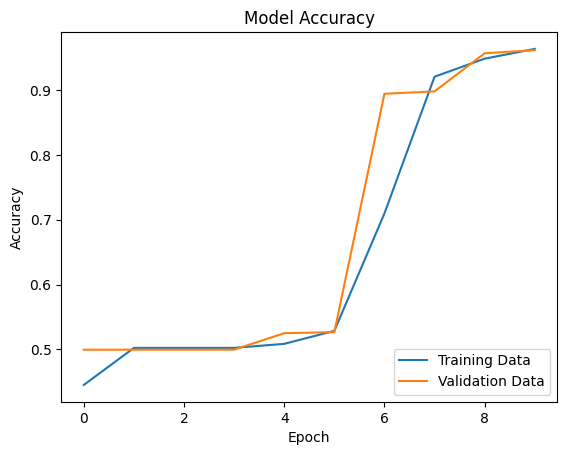

In [117]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

plt.legend(['Training Data', 'Validation Data'], loc='lower right')
plt.show()

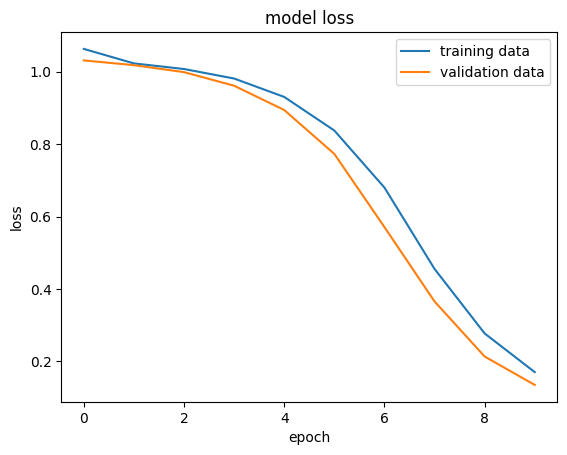

In [118]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

In [119]:
X_train.to_csv("preprocessed.csv")

In [120]:
import pickle

filename = 'model.sav'
pickle.dump(model, open(filename, 'wb'))

In [121]:
# loading the saved model
loaded_model = pickle.load(open('model.sav', 'rb'))

In [128]:
# prediksi perlu diralat

import numpy as np

# input data = (saldo user, transaksi)
input_data = (20000,20000)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if np.all(prediction[0] == 0):
    print('Boros')
elif np.all(prediction[0] == 1):
    print('Hemat')
else:
    print('Normal')

1/1 [==============================] - 0s 26ms/step
[[9.082476e-05 9.040134e-01 9.589580e-02]]
Normal


In [123]:
for column in X.columns:
  print(column)

SaldoUser
TransactionAmount(IDR)


In [124]:
X.head()

,SaldoUser,TransactionAmount(IDR)
0,3357465,4710
1,427843,5275572
2,3367902,86485
3,163266535,388145
4,1265133,332090


In [125]:
Y.head()

0    1
1    0
2    2
3    0
4    0
Name: Label, dtype: int64